In [1]:
# Load main packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import os
import time

        
# Load CNN packages 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
%%time

# Load data
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
VAL_SPLIT = 0.2
SEED = 42

random.seed(SEED)

train = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split=VAL_SPLIT,
    subset="training",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    label_mode="categorical"
)

Found 6239 files belonging to 12 classes.
Using 4992 files for training.
CPU times: total: 1.16 s
Wall time: 1.31 s


In [4]:
%%time

validation = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    validation_split=VAL_SPLIT,
    subset="validation",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    label_mode="categorical"
)

Found 6239 files belonging to 12 classes.
Using 1247 files for validation.
CPU times: total: 1.08 s
Wall time: 1.2 s


In [5]:
classes = train.class_names

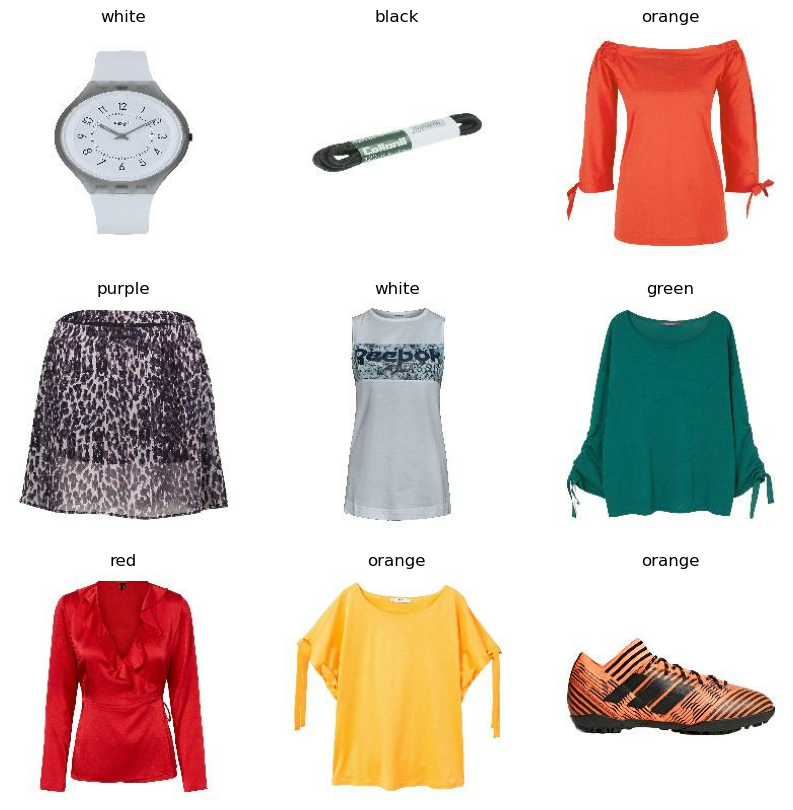

In [6]:
# Take a look

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])
        plt.axis("off")

In [7]:
print("Classes:", classes)

Classes: ['black', 'blue', 'brown', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'white', 'yellow']


 Preprocessing

In [8]:
# Data Augmentation
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

augmented_train = train.map(lambda x, y: (data_augmentation(x, training=True), y))

In [9]:
# Configure the dataset for performance
#train = train.prefetch(buffer_size=32)
augmented_train = augmented_train.prefetch(buffer_size=32)
validation = validation.prefetch(buffer_size=32)

Model

Build layers (input, hidden, output)

Define loss function and metrics

Train the model

Visualize training

In [10]:
# instantiating the model in the strategy scope creates the model on the TPU
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SIZE + (3,)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax'))

print("Input shape:", IMG_SIZE + (3,))

Input shape: (224, 224, 3)


In [11]:
# Loss and metrics definition
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

In [12]:
# Training parameters
EPOCHS = 50
CALLBACKS = [keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5")]

# Training
history = model.fit(
    augmented_train,
    epochs=EPOCHS,
    callbacks=CALLBACKS,
    validation_data=validation,
)

Epoch 1/50
156/156 [==============================] - 338s 2s/step - loss: 3.2152 - categorical_accuracy: 0.4034 - val_loss: 1.3922 - val_categorical_accuracy: 0.5092
Epoch 2/50
156/156 [==============================] - 273s 2s/step - loss: 1.3659 - categorical_accuracy: 0.5523 - val_loss: 1.1878 - val_categorical_accuracy: 0.5910
Epoch 3/50
156/156 [==============================] - 250s 2s/step - loss: 1.1019 - categorical_accuracy: 0.6400 - val_loss: 1.0989 - val_categorical_accuracy: 0.6159
Epoch 4/50
156/156 [==============================] - 254s 2s/step - loss: 1.0873 - categorical_accuracy: 0.6404 - val_loss: 1.1376 - val_categorical_accuracy: 0.6183
Epoch 5/50
156/156 [==============================] - 261s 2s/step - loss: 1.0353 - categorical_accuracy: 0.6639 - val_loss: 1.0487 - val_categorical_accuracy: 0.6840
Epoch 6/50
156/156 [==============================] - 311s 2s/step - loss: 0.9758 - categorical_accuracy: 0.6775 - val_loss: 1.1709 - val_categorical_accuracy: 0.623

Epoch 50/50
156/156 [==============================] - 661s 4s/step - loss: 0.5429 - categorical_accuracy: 0.8101 - val_loss: 1.0494 - val_categorical_accuracy: 0.7338


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


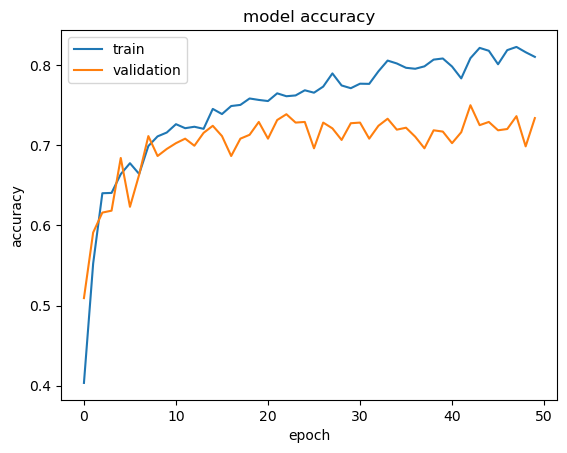

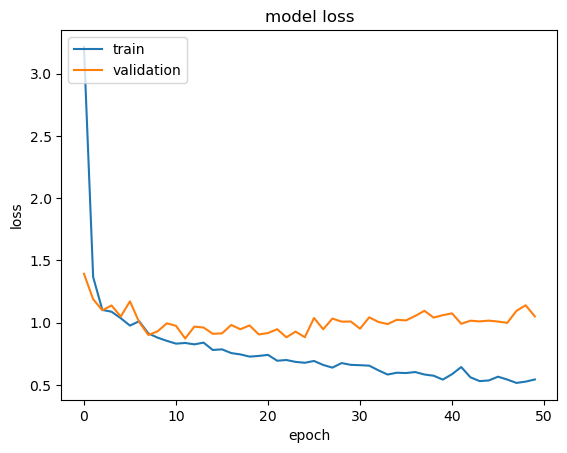

In [13]:
# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Conclusion

In [23]:
imgs = [
    'test/1000000033.jpg',
    'test/1000000678.jpg',
    'test/1000001233.jpg',
    'test/1000001547.jpg',
    'test/1000002504.jpg',
    'test/1000005261.jpg'
]

1/1 [==============================] - 11s 11s/step


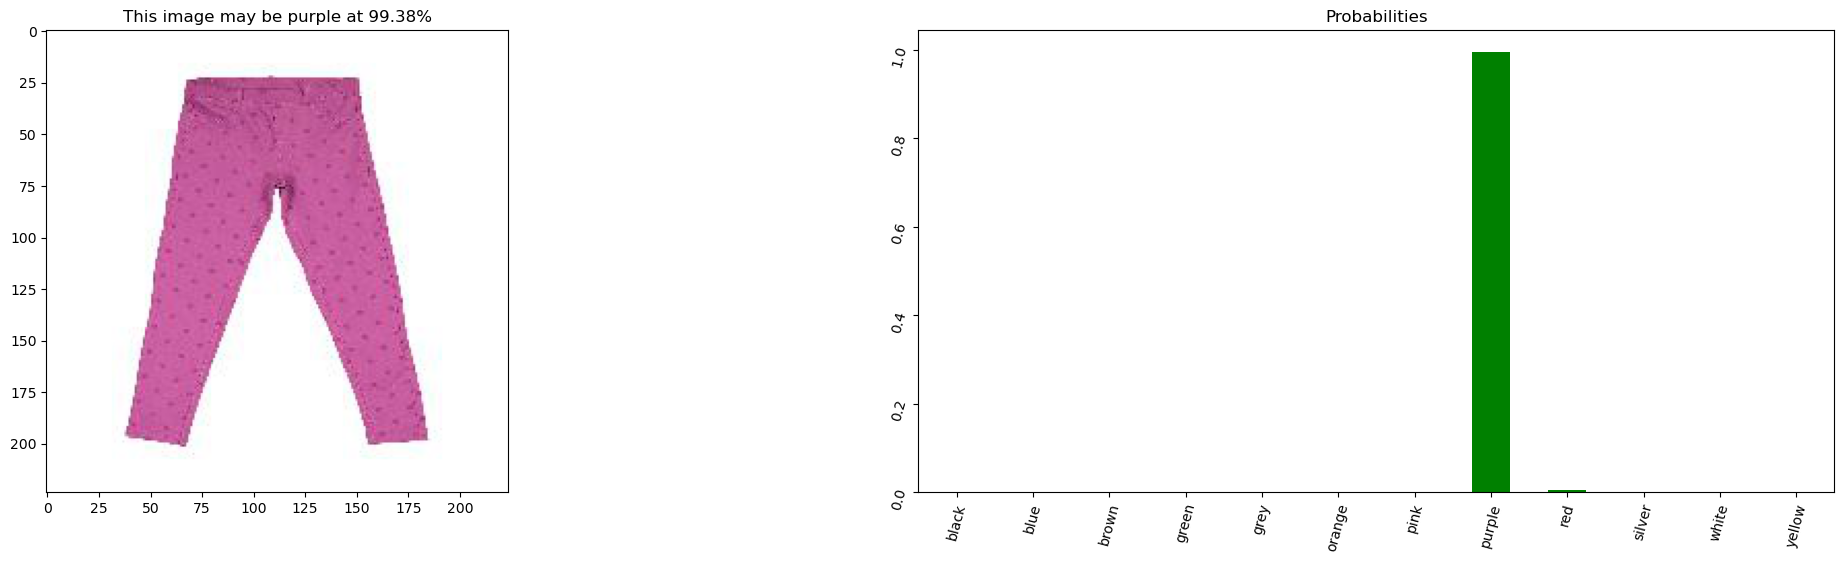

1/1 [==============================] - 0s 392ms/step


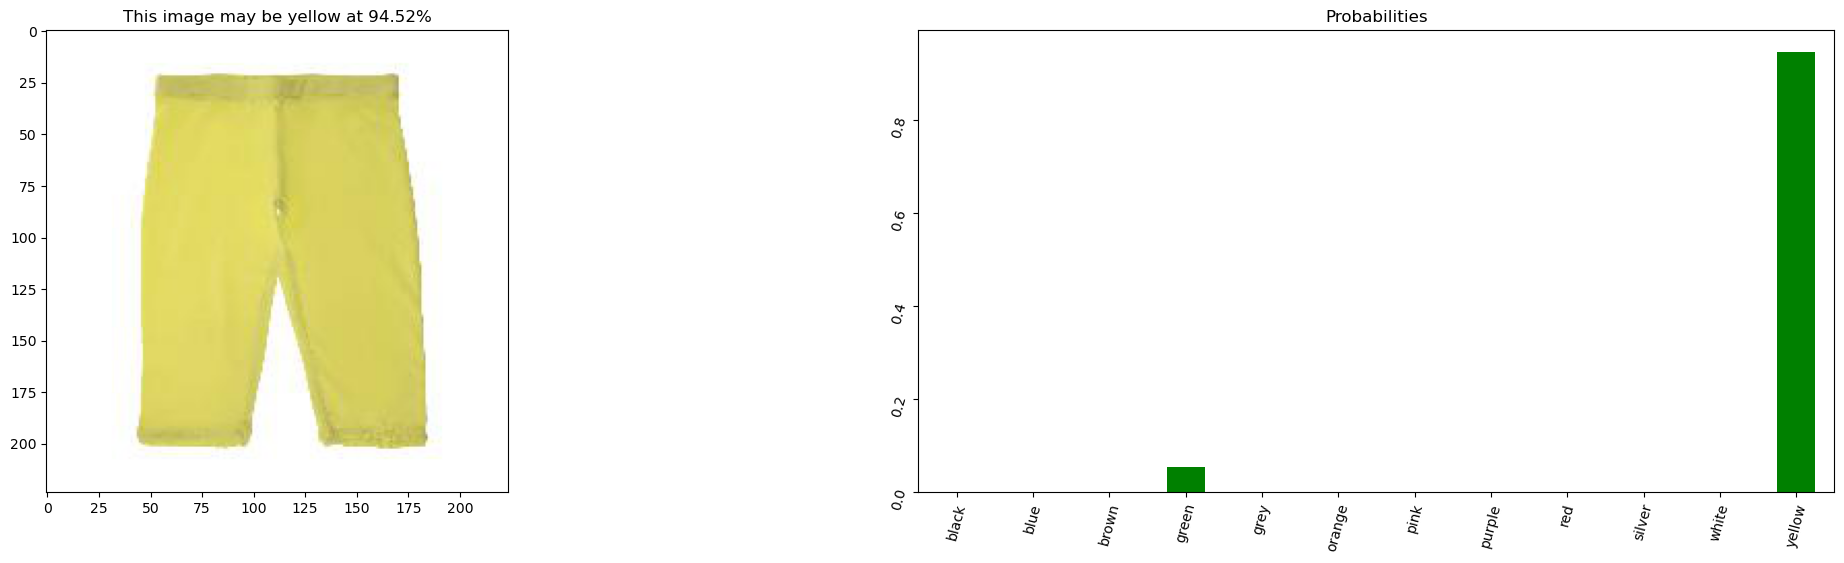

1/1 [==============================] - 0s 355ms/step


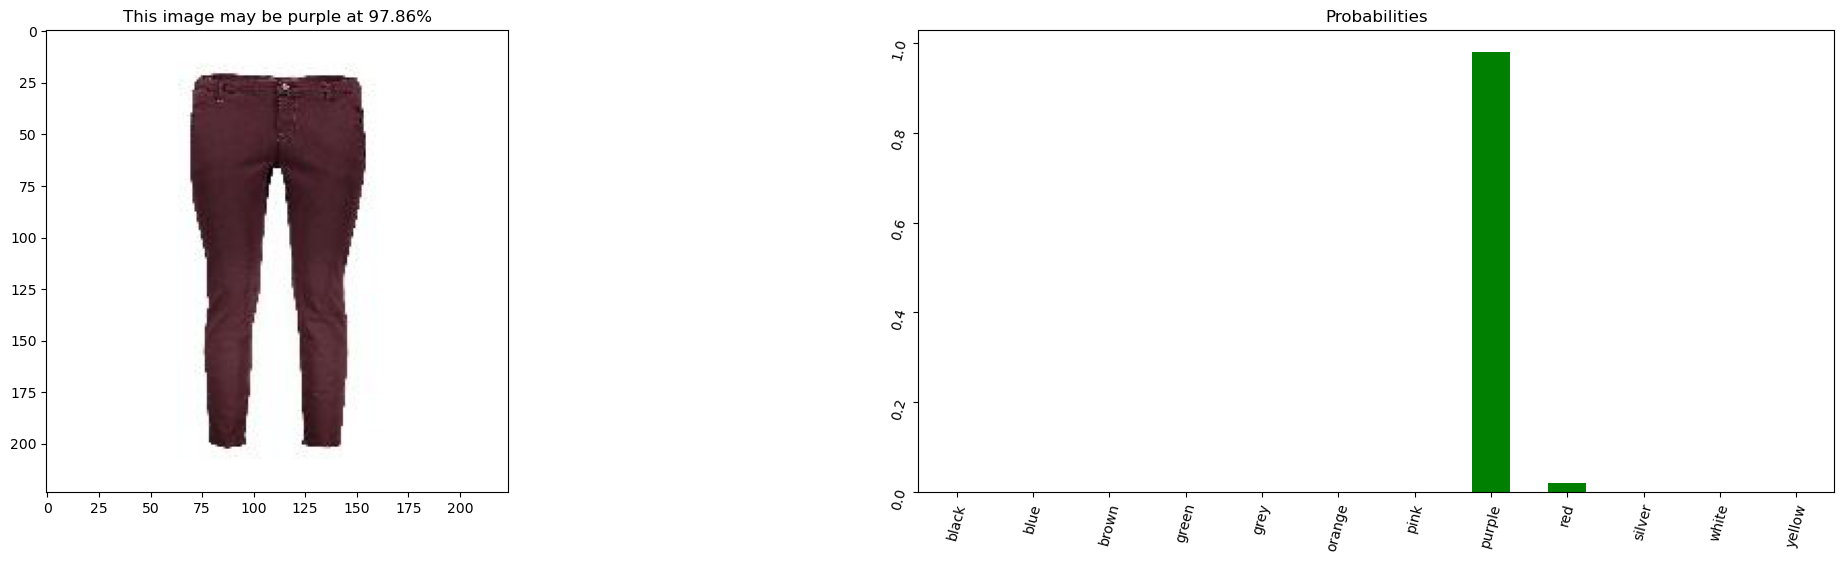

1/1 [==============================] - 0s 188ms/step


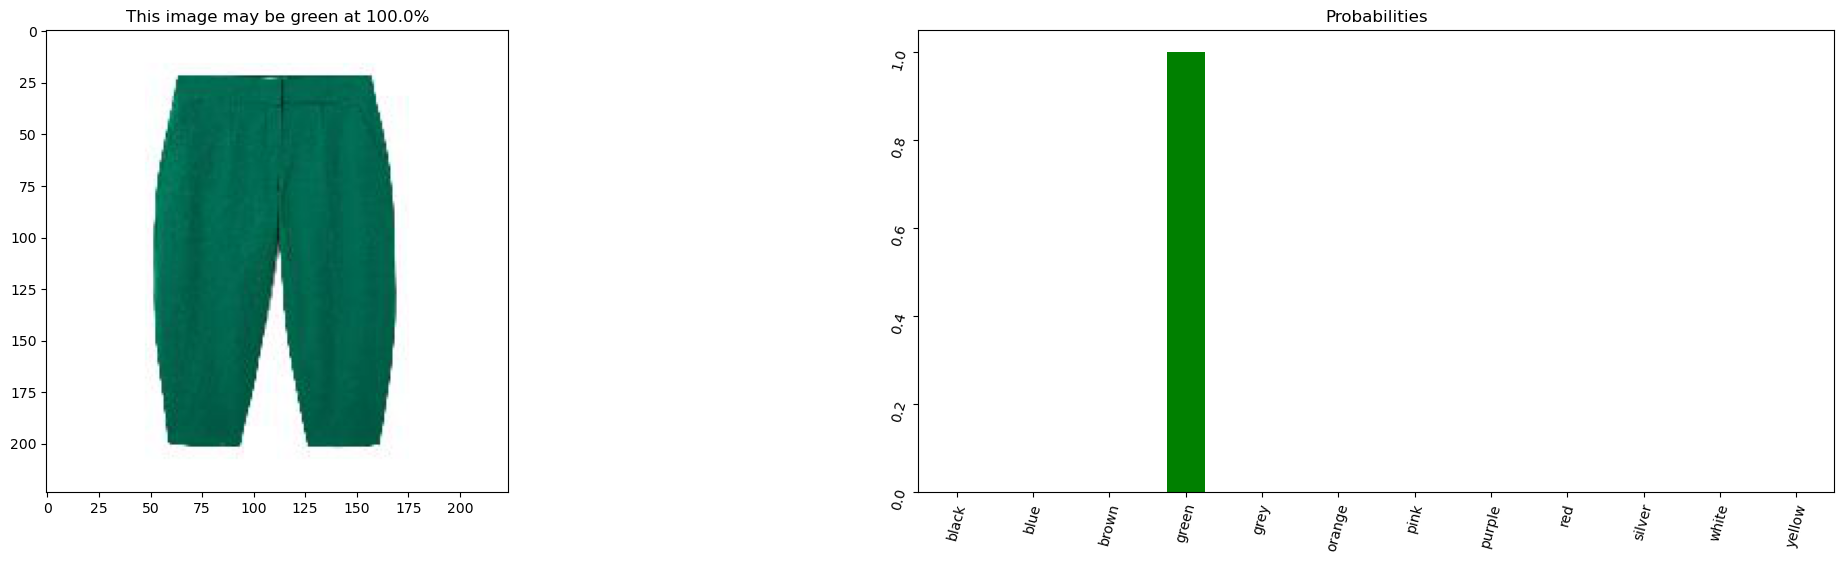

1/1 [==============================] - 0s 399ms/step


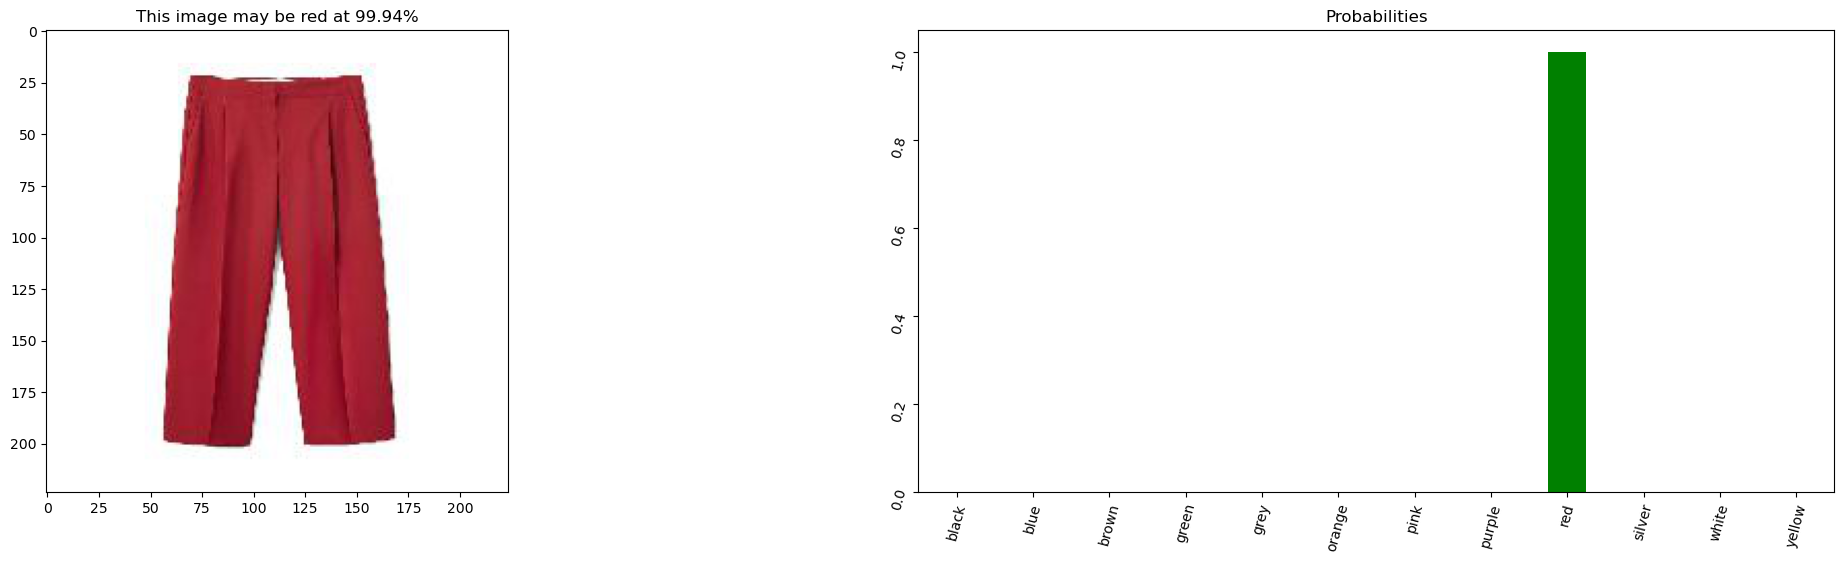

1/1 [==============================] - 1s 532ms/step


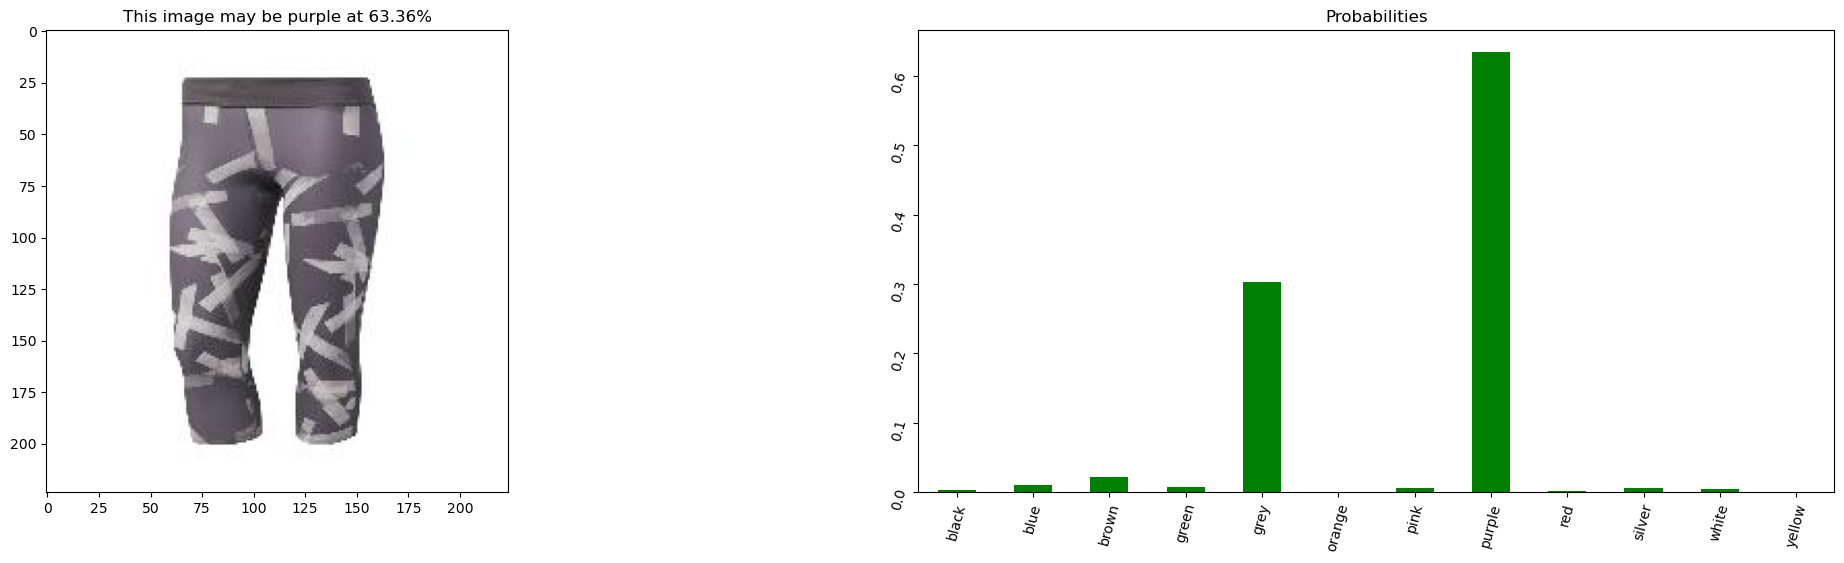

In [24]:
for img in imgs:
    # Load the image
    raw_img = keras.preprocessing.image.load_img(img, target_size=IMG_SIZE)
    
    # Conver to numpy array
    img_array = keras.preprocessing.image.img_to_array(raw_img)
    
    # Reshaping
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    
    # Make predictions
    predictions = model.predict(img_array)
    series      = pd.Series(predictions[0], index=classes)
    
    # Get score
    proba      = np.max(predictions)
    pred_class = classes[np.argmax(predictions)]
    
    # Display results
    fig, ax = plt.subplots(1, 2, figsize=(26, 6))
    
    ax[0].imshow(raw_img)
    ax[0].title.set_text(f"This image may be {pred_class} at {round(proba * 100,2)}%")
    
    series.plot(kind='bar', ax=ax[1], color='green')
    ax[1].title.set_text("Probabilities")
    ax[1].tick_params(labelrotation=75)
    
    plt.show()